# ` Dataset MetaData `

work_year: The year was paid.

experience_level: The experience level in the job during the year with the following possible values: EN Entry-level / Junior MI 

Mid-level / Intermediate SE Senior-level / Expert EX Executive-level / Director

employment_type: The type of employement for the role: PT Part-time FT Full-time CT Contract FL Freelance

job_title: The role worked in during the year.

salary: The total gross salary amount paid.

salary_currency: The currency of the salary paid as an ISO 4217 currency code.

salary_in_usd: The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com).

employee_residence: Employee's primary country of residence in during the work year as an ISO 3166 country code.

remote_ratio: The overall amount of work done remotely, possible values are as follows: 0 No remote work (less than 20%) 50 
Partially remote 100 Fully remote (more than 80%)

company_location: The country of the employer's main office or contracting branch as an ISO 3166 country code.

company_size: The average number of people that worked for the company during the year: S less than 50 employees (small) M 50 to 
250 employees (medium) L more than 250 employees (large)

# ` Importing Liberaries `


In [104]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# ` Importing and cleaning data `

In [105]:
df = pd.read_csv('ds_salaries.csv')
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [106]:
#  there is no null values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [107]:
# delete Unnamed: 0  column cuz it is not important 
df.drop(columns = 'Unnamed: 0', inplace = True)

In [108]:
# exlore duplicates
# we have 42 duplicate values and we have to delete them 
df.duplicated().sum()

42

In [109]:
# deleting duplicates
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

# ` EDA (Ploting with summaries) `

## total salaries per year

In [110]:
total_salaries_per_year = df.groupby('work_year')['salary_in_usd'].sum()
total_salaries_per_year

work_year
2020     6898536
2021    21377539
2022    34218769
Name: salary_in_usd, dtype: int64

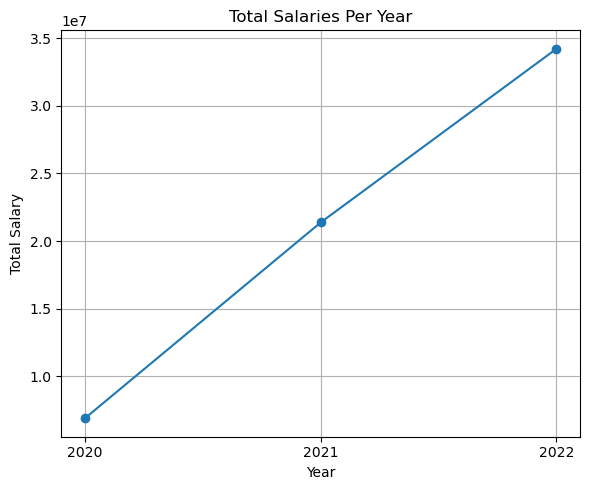

In [111]:
# Convert the Series to a DataFrame for easier plotting
total_salaries_df = total_salaries_per_year.reset_index()

# Plotting
plt.figure(figsize=(6, 5))
plt.plot(total_salaries_df['work_year'], total_salaries_df['salary_in_usd'], marker='o', linestyle='-')
plt.title('Total Salaries Per Year')
plt.xlabel('Year')
plt.ylabel('Total Salary')
plt.grid(True)
plt.xticks(total_salaries_df['work_year'])  # Set x-axis ticks to be the years
plt.tight_layout()
plt.show()



### average salaries per year

In [112]:
avg_salaries_per_year = df.groupby('work_year')['salary_in_usd'].mean()
round(avg_salaries_per_year, 3)

work_year
2020     95813.000
2021     99430.414
2022    123089.097
Name: salary_in_usd, dtype: float64

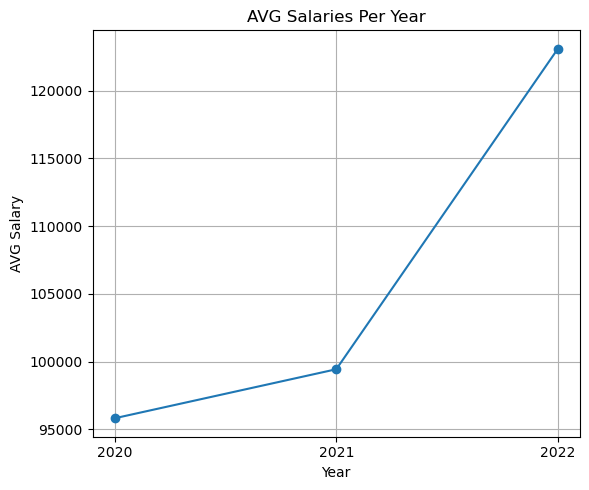

In [113]:
# Convert the Series to a DataFrame for easier plotting
average_salaries_df = avg_salaries_per_year.reset_index()

# Plotting
plt.figure(figsize=(6, 5))
plt.plot(average_salaries_df['work_year'], average_salaries_df['salary_in_usd'], marker='o', linestyle='-')
plt.title('AVG Salaries Per Year')
plt.xlabel('Year')
plt.ylabel('AVG Salary')
plt.grid(True)
plt.xticks(total_salaries_df['work_year'])  # Set x-axis ticks to be the years
plt.tight_layout()
plt.show()


## ` Jobs `

### Common job per year

In [114]:
df['work_year'].value_counts()

work_year
2022    278
2021    215
2020     72
Name: count, dtype: int64

In [115]:
df['job_title'].value_counts()

job_title
Data Scientist                              130
Data Engineer                               121
Data Analyst                                 82
Machine Learning Engineer                    39
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                  

In [116]:
# Group by year and job title, count occurrences, and sort
common_job_per_year = df.groupby(['work_year', 'job_title']).size().reset_index(name='count')
common_job_per_year = common_job_per_year.sort_values(by=['work_year', 'count'], ascending=[True, False])

# Get the top 5 job titles for each year
top_5_per_year = common_job_per_year.groupby('work_year').head(5)

top_5_per_year

,work_year,job_title,count
10,2020,Data Scientist,21
6,2020,Data Engineer,11
5,2020,Data Analyst,7
16,2020,Machine Learning Engineer,5
2,2020,Big Data Engineer,3
43,2021,Data Scientist,44
38,2021,Data Engineer,31
56,2021,Machine Learning Engineer,18
34,2021,Data Analyst,17
63,2021,Research Scientist,10


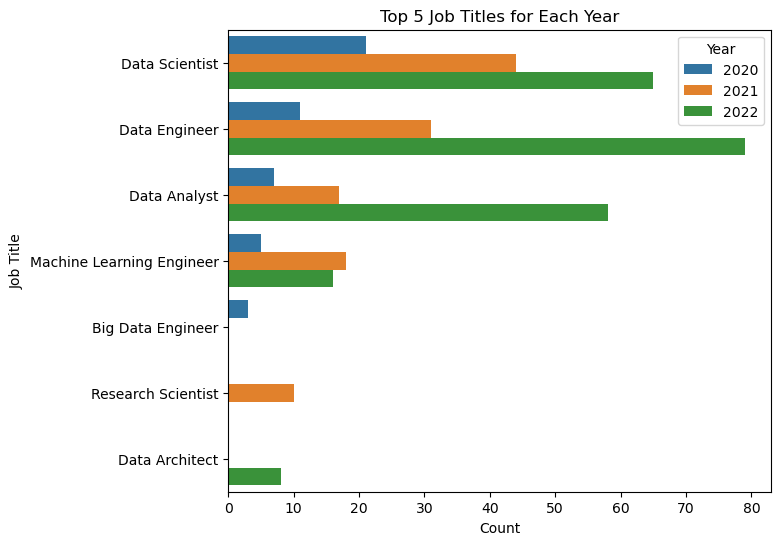

In [117]:
# Plotting
plt.figure(figsize=(7, 6))
sns.barplot(x='count', y='job_title', hue='work_year', data=top_5_per_year)
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.title('Top 5 Job Titles for Each Year')
plt.legend(title='Year')
plt.show()

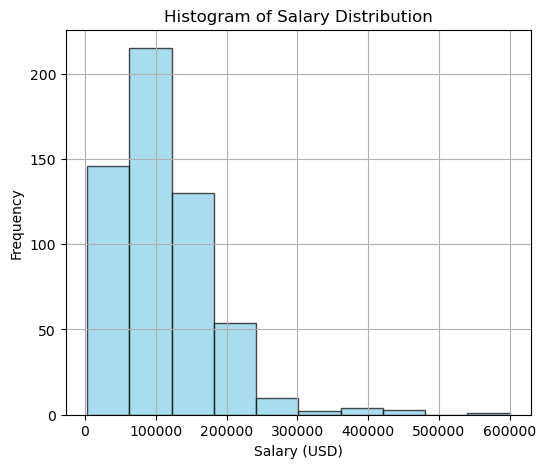

In [118]:
plt.figure(figsize=(6, 5))
plt.hist(df['salary_in_usd'], bins=10, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Salary (USD)')
plt.ylabel('Frequency')
plt.title('Histogram of Salary Distribution')
plt.grid(True)
plt.show()

### Average salaries per job

In [119]:
print('salaries strat from:', df['salary_in_usd'].max() ,'to:' ,df['salary_in_usd'].min())

salaries strat from: 600000 to: 2859


In [120]:
avg_sal_per_job = df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending = False)
round(avg_sal_per_job, 3)

job_title
Data Analytics Lead                         405000.000
Principal Data Engineer                     328333.333
Financial Data Analyst                      275000.000
Principal Data Scientist                    215242.429
Director of Data Science                    195074.000
Data Architect                              177873.909
Applied Data Scientist                      175655.000
Analytics Engineer                          175000.000
Data Specialist                             165000.000
Head of Data                                160162.600
Machine Learning Scientist                  158412.500
Data Science Manager                        158328.500
Director of Data Engineering                156738.000
Head of Data Science                        146718.750
Applied Machine Learning Scientist          142068.750
Lead Data Engineer                          139724.500
Data Analytics Manager                      127134.286
Cloud Data Engineer                         124647.000


### ` ramote ratio and currency `

### most common and used currency

In [122]:
currency_counts = df['salary_currency'].value_counts()

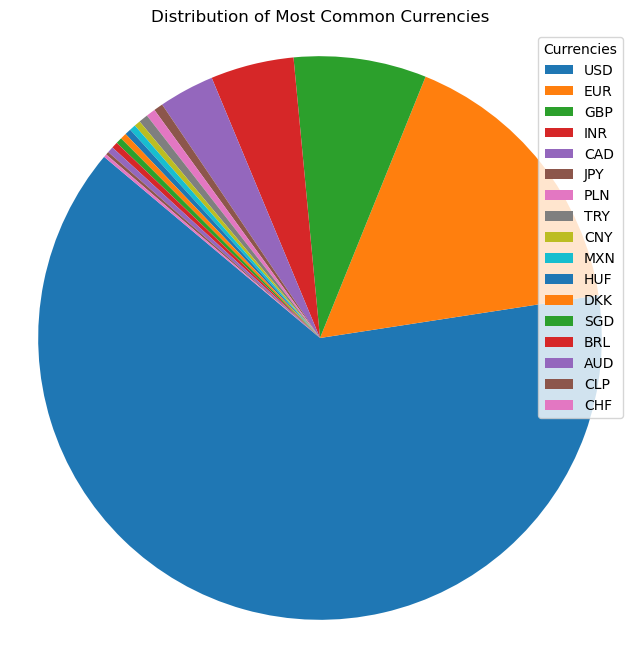

In [123]:
# Plotting
plt.figure(figsize=(8, 8))
plt.pie(currency_counts, labels=[''] * len(currency_counts), startangle=140)
plt.title('Distribution of Most Common Currencies')
plt.legend(currency_counts.index, title="Currencies", loc="upper right", )

plt.axis('equal') 
plt.show()

### Ratio per year

In [124]:
df['remote_ratio'].value_counts()

remote_ratio
100    346
0      121
50      98
Name: count, dtype: int64

In [125]:
rat_per_year = df.groupby('work_year')['remote_ratio'].value_counts()
rat_per_year

work_year  remote_ratio
2020       100              36
           50               21
           0                15
2021       100             116
           50               65
           0                34
2022       100             194
           0                72
           50               12
Name: count, dtype: int64

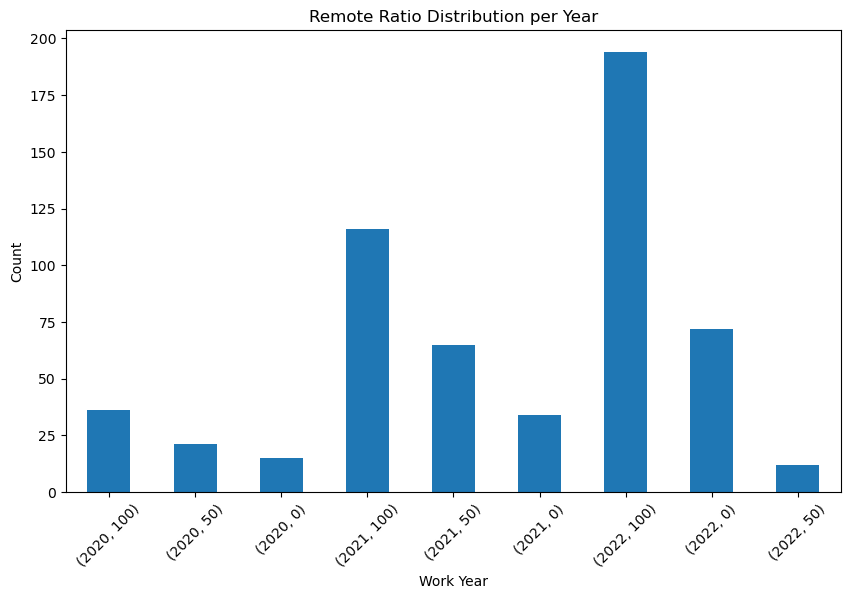

In [127]:
# Plotting
rat_per_year.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Work Year')
plt.ylabel('Count')
plt.title('Remote Ratio Distribution per Year')
plt.xticks(rotation=45)
plt.show()

### remote ratio with salaries

In [130]:
rat_by_avg_sal = df.groupby('remote_ratio')['salary_in_usd'].mean()
rat_by_avg_sal

remote_ratio
0      105785.404959
50      80721.897959
100    120763.190751
Name: salary_in_usd, dtype: float64

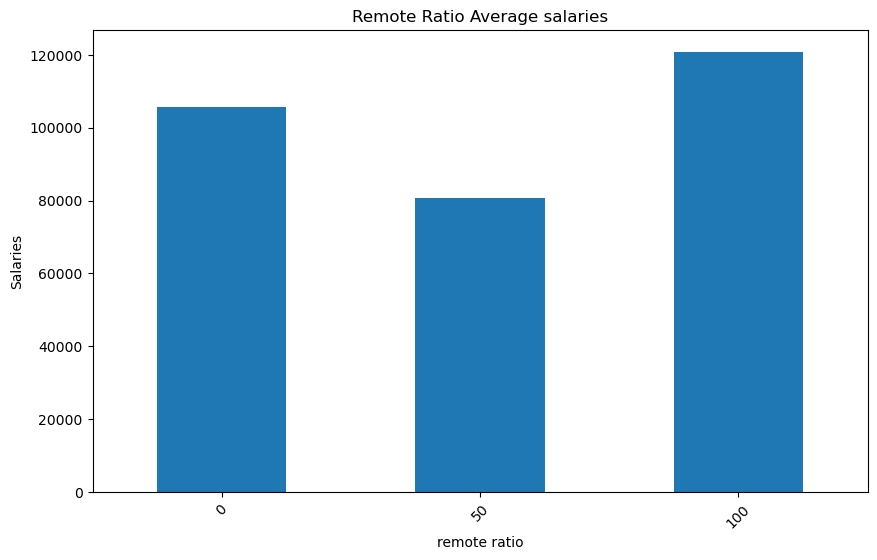

In [131]:
# Plotting
rat_by_avg_sal.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('remote ratio')
plt.ylabel('Salaries')
plt.title('Remote Ratio Average salaries')
plt.xticks(rotation=45)
plt.show()

# ` Company Size `

### average salaries for each type in each year

In [132]:
df['company_size'].value_counts()

company_size
M    290
L    193
S     82
Name: count, dtype: int64

In [143]:
avg_type_year = df.groupby(['work_year', 'company_size'])['salary_in_usd'].mean()
round(avg_type_year, 3)

work_year  company_size
2020       L               106303.848
           M               115467.500
           S                70958.560
2021       L               117772.581
           M                74154.792
           S                81509.844
2022       L               128554.884
           M               124427.372
           S                78633.750
Name: salary_in_usd, dtype: float64

<Figure size 1000x800 with 0 Axes>

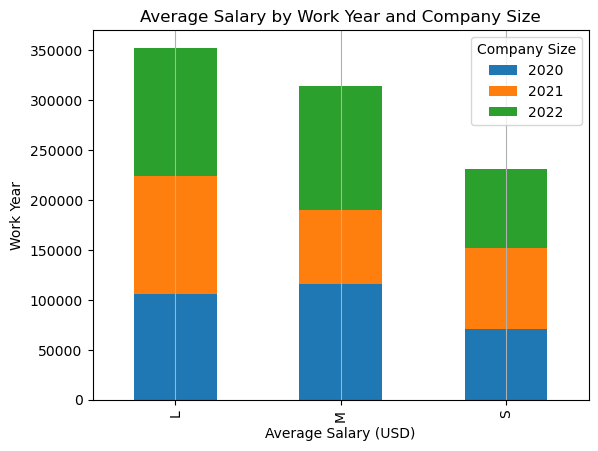

In [176]:
# Round the average salaries to 3 decimal places
avg_type_year = round(avg_type_year, 3)

# Pivot the data to facilitate plotting
avg_type_year = avg_type_year.unstack()

# Plotting
plt.figure(figsize=(10, 8))
avg_type_year.plot(kind='bar', stacked=True)
plt.xlabel('Average Salary (USD)')
plt.ylabel('Work Year')
plt.title('Average Salary by Work Year and Company Size')
plt.legend(title='Company Size')
plt.grid(axis='x')
plt.show()

### common pos for each type 

In [151]:
# Group by year and job title, count occurrences, and sort
common_pos_per_type = df.groupby(['company_size', 'job_title']).size().reset_index(name='count')
common_pos_per_type = common_pos_per_type.sort_values(by=['company_size', 'count'], ascending=[True, False])

# Get the top 5 job titles for each year
top_5_pos_per_type = common_pos_per_type.groupby('company_size').head(5)

top_5_pos_per_type

,company_size,job_title,count
17,L,Data Scientist,43
12,L,Data Engineer,34
7,L,Data Analyst,13
29,L,Machine Learning Engineer,13
38,L,Research Scientist,11
53,M,Data Engineer,81
57,M,Data Scientist,66
49,M,Data Analyst,62
66,M,Machine Learning Engineer,14
52,M,Data Architect,8


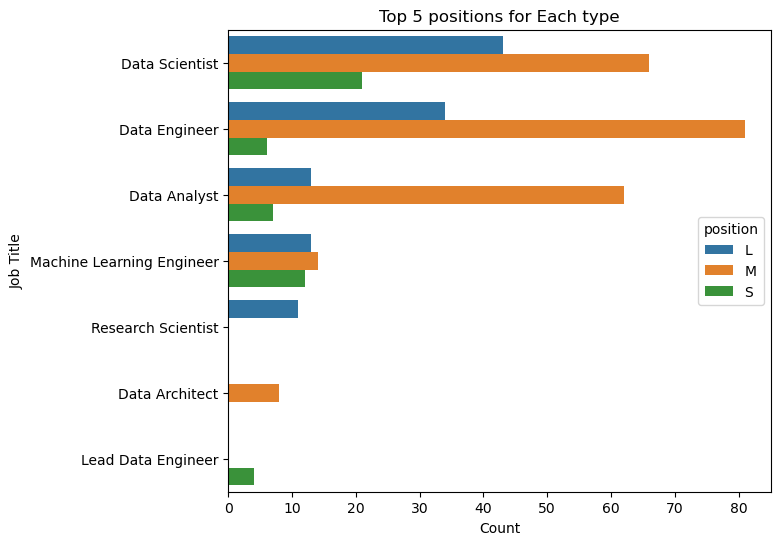

In [153]:
# Plotting
plt.figure(figsize=(7, 6))
sns.barplot(x='count', y='job_title', hue='company_size', data=top_5_pos_per_type)
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.title('Top 5 positions for Each type')
plt.legend(title='position')
plt.show()

### average salaries for each employment type in each company type

In [164]:
avg_sal_emp_type = df.groupby(['company_size', 'employment_type'])['salary_in_usd'].mean()
avg_sal_emp_type

company_size  employment_type
L             CT                 185000.000000
              FL                  20000.000000
              FT                 118620.111702
              PT                  62349.000000
M             CT                  68437.500000
              FL                  56000.000000
              FT                 116728.421986
              PT                  31940.750000
S             CT                 416000.000000
              FL                  60000.000000
              FT                  76727.210526
              PT                  19561.000000
Name: salary_in_usd, dtype: float64

<Figure size 1000x800 with 0 Axes>

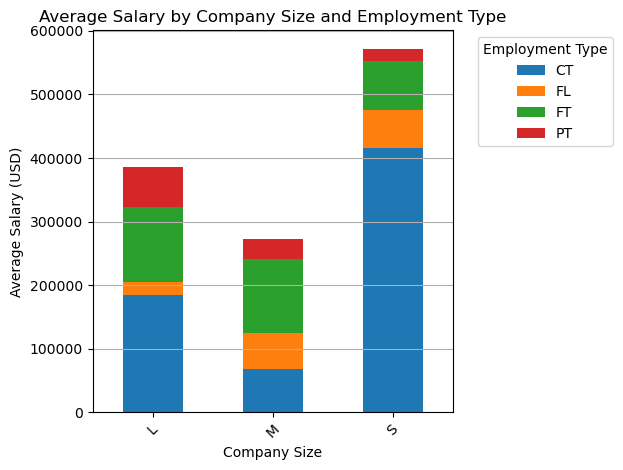

In [174]:
# Reset the index to facilitate plotting
avg_sal_emp_type = avg_sal_emp_type.reset_index(drop=True)

# Pivot the data to facilitate plotting
avg_sal_emp_type_pivot = avg_sal_emp_type.pivot(index='company_size', columns='employment_type', values='salary_in_usd')

# Plotting
plt.figure(figsize=(10, 8))
avg_sal_emp_type_pivot.plot(kind='bar', stacked=True)
plt.ylabel('Average Salary (USD)')
plt.xlabel('Company Size')
plt.title('Average Salary by Company Size and Employment Type')

# Adjust legend position
plt.legend(title='Employment Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### most exp level required

In [178]:
df['experience_level'].value_counts()

experience_level
SE    243
MI    208
EN     88
EX     26
Name: count, dtype: int64

In [191]:
most_required = df.groupby(['experience_level','job_title']).size().reset_index(name='count')
most_required = most_required.sort_values(by = ['count'], ascending = False)

most_required = most_required.groupby('experience_level').head(3)
most_required

,experience_level,job_title,count
49,MI,Data Scientist,59
79,SE,Data Engineer,54
44,MI,Data Engineer,51
83,SE,Data Scientist,49
74,SE,Data Analyst,40
41,MI,Data Analyst,28
12,EN,Data Scientist,22
8,EN,Data Analyst,12
10,EN,Data Engineer,12
25,EX,Director of Data Science,6


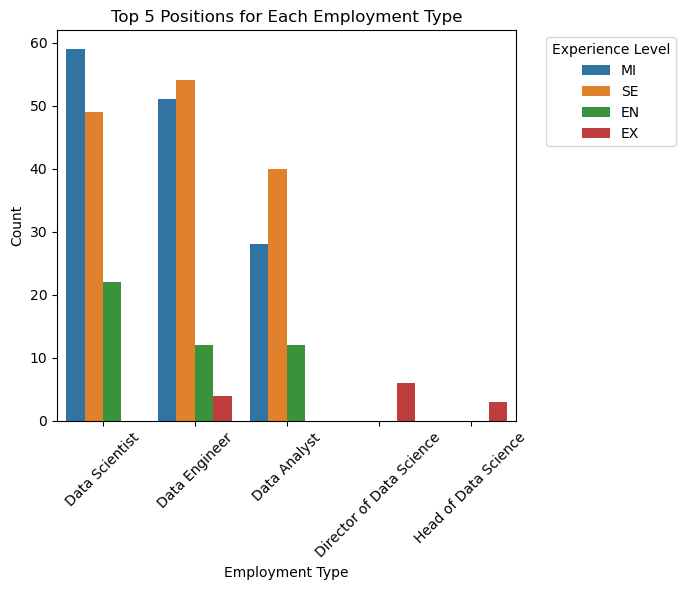

In [192]:
# Plotting
plt.figure(figsize=(7, 6))
sns.barplot(x='job_title', y='count', hue='experience_level', data=most_required)
plt.xlabel('Employment Type')
plt.ylabel('Count')
plt.title('Top 5 Positions for Each Employment Type')
plt.legend(title='Experience Level', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()

### ` salary growth `

In [197]:
# Calculate and print salary growth
initial_salary = df['salary_in_usd'].iloc[0]
final_salary = df['salary_in_usd'].iloc[-1]
num_years = df['work_year'].iloc[-1] - df['work_year'].iloc[0]
annual_growth_rate = ((final_salary / initial_salary) ** (1 / num_years)) - 1
print("Annual Growth Rate: {:.2%}".format(annual_growth_rate))

Annual Growth Rate: 58.28%


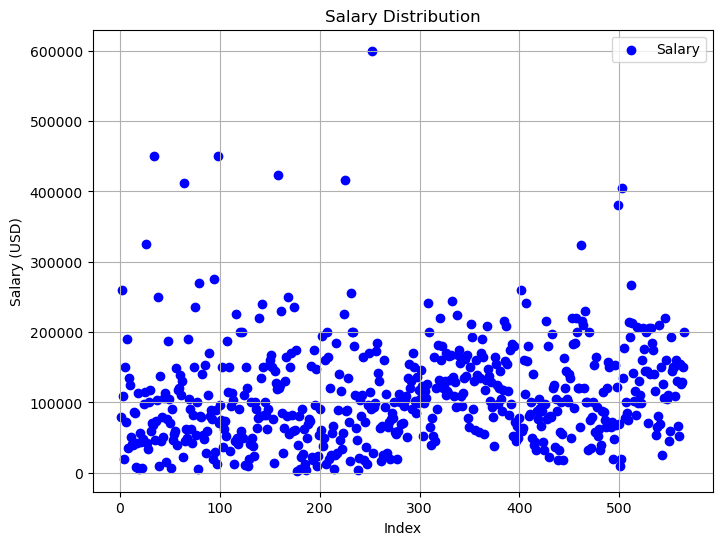

In [198]:
# Create an index for the DataFrame
index = range(1, len(df) + 1)

# Create scatter plot for salary
plt.figure(figsize=(8, 6))
plt.scatter(index, df['salary_in_usd'], color='blue', label='Salary')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Salary (USD)')
plt.title('Salary Distribution')

# Display legend
plt.legend()

# Show plot
plt.grid(True)
plt.show()

# ` Summary `

### over years total salaries increases that requires increasing companies value 
### Average Salaries in 2020 and 2021 are very close but we have a huge raise in the 2022 that means market size increases
### the most common job over these 3 years is Data Science 
### Machine Learning has a decrease in the last year maybe that means decrease of  interest 
### Data Analysis and Data Engineer have a huge raise in the last year with very big interest
### Big Data Engineer, Research Scientist, Data Architect have no spacific pattern but there are not with top
### Data Science , Data Engineering and Data Architect salaries are very close but the the Data Analysis Lead are very high 
### most salaries in data jobs wii be around 100K and 200K , we have a good percentage in 300K but not like previous  
### USD is most common used currency in our data
### Full Remote increases over years
### partial remot increases until 2022 in this year it faces a huge lack 
### non remot increases over years that's mean most compaines prefered full remote or non remote but not Hybrid
### fully remote has the most average salaries ever and partial in the second level but overall the 3 are very close
### for large companies salaries increases iver the year with almost constant ratio
### in medium i noticed a stranhe pattern in 2021 with increases of salaries
### Large and medium companies very close in salaries but they have a huge difference comparing between small
### Medium companies rquires most Data jobs ever  that's becuase they want to level up to get large 
### Data Science is the most required job in all types 
### machine learning engineer less required than Data Scientist because of large salaries of ML engineers
### CT is the most range of salaries in all three companirs except (medium is FT) but not the heighest
### The PT is the Highest salaries in all companies but the PT in small companies is the highest ever
### in the MI level the Data Science is the most required job but in the SE the Data Engineer is 
### most companies require level MI in Data Science and in SE in Data Analysis
### Annual Growth Rate: 58.28%